# Test if replacing "frame" with the time in seconds since the initial time step works in the existing tracking implementation

Based on the idealised trajectory case

In [1]:
import tobac
import tobac.testing

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import pandas as pd
import xarray as xr

In [3]:
test_data = tobac.testing.make_simple_sample_data_2D(data_type="xarray")
test_data

<xarray.DataArray 'w' (time: 100, y: 50, x: 100)> Size: 4MB
[500000 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 800B 2000-01-01T12:00:00 ... 2000-01-01T...
  * y          (y) float64 400B 0.0 1e+03 2e+03 ... 4.7e+04 4.8e+04 4.9e+04
  * x          (x) float64 800B 0.0 1e+03 2e+03 ... 9.7e+04 9.8e+04 9.9e+04
    latitude   (y, x) float64 40kB ...
    longitude  (y, x) float64 40kB ...
Attributes:
    units:    m s-1

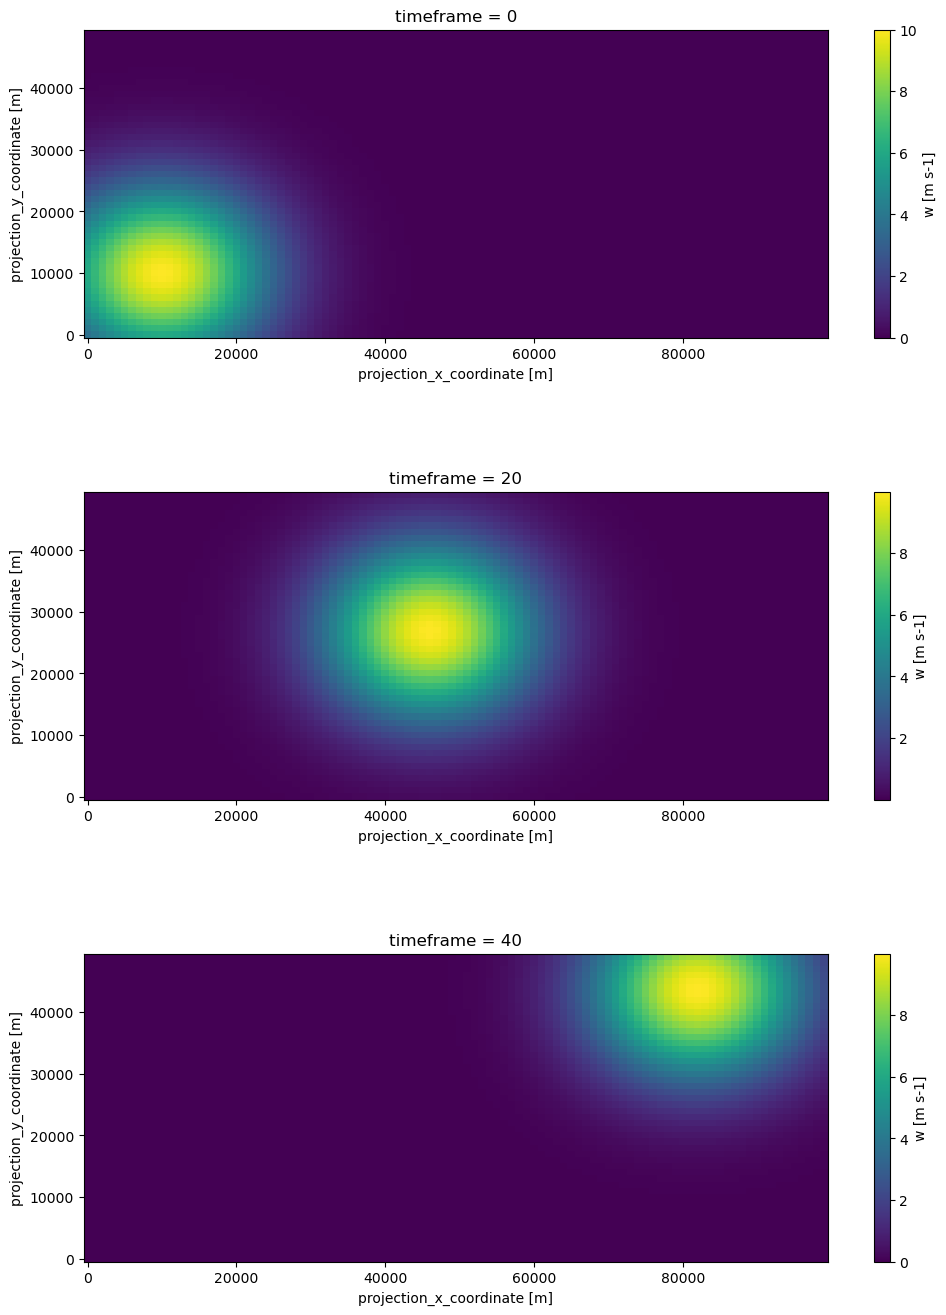

In [4]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(12, 16), sharey=True)
plt.subplots_adjust(hspace=0.5)

for i, itime in enumerate([0, 20, 40]):
    # plot the 2D blob field in colors
    test_data.isel(time=itime).plot(ax=axs[i])

    axs[i].set_title(f"timeframe = {itime}")

In [5]:
dxy, dt = tobac.get_spacings(test_data)

In [6]:
test_data.max()

<xarray.DataArray 'w' ()> Size: 8B
array(10.)

In [7]:
threshold = 9

In [8]:
features = tobac.feature_detection_multithreshold(test_data, dxy, threshold)

In [9]:
features

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_y_coordinate,projection_x_coordinate,latitude,longitude
0,0,1,10.000000,10.000000,69,9,1,2000-01-01 12:00:00,2000-01-01 12:00:00,10000.000000,10000.000000,24.100000,150.100000
1,1,1,10.939394,11.848485,66,9,2,2000-01-01 12:01:00,2000-01-01 12:01:00,10939.393939,11848.484848,24.118485,150.109394
2,2,1,11.707692,13.661538,65,9,3,2000-01-01 12:02:00,2000-01-01 12:02:00,11707.692308,13661.538462,24.136615,150.117077
3,3,1,12.569231,15.353846,65,9,4,2000-01-01 12:03:00,2000-01-01 12:03:00,12569.230769,15353.846154,24.153538,150.125692
4,4,1,13.200000,17.107692,65,9,5,2000-01-01 12:04:00,2000-01-01 12:04:00,13200.000000,17107.692308,24.171077,150.132000
5,5,1,14.184615,19.000000,65,9,6,2000-01-01 12:05:00,2000-01-01 12:05:00,14184.615385,19000.000000,24.190000,150.141846
6,6,1,15.060606,20.848485,66,9,7,2000-01-01 12:06:00,2000-01-01 12:06:00,15060.606061,20848.484848,24.208485,150.150606
7,7,1,15.953125,22.765625,64,9,8,2000-01-01 12:07:00,2000-01-01 12:07:00,15953.125000,22765.625000,24.227656,150.159531
8,8,1,16.707692,24.338462,65,9,9,2000-01-01 12:08:00,2000-01-01 12:08:00,16707.692308,24338.461538,24.243385,150.167077
9,9,1,17.676923,26.169231,65,9,10,2000-01-01 12:09:00,2000-01-01 12:09:00,17676.923077,26169.230769,24.261692,150.176769


In [76]:
issubclass(type(features["time"][0]), cftime._cftime.datetime)

True

In [83]:
t0 = features["time"][0]
time_seconds = [(t - t0).total_seconds() for t in features.time]

In [84]:
features["frame"] = time_seconds

In [85]:
trajectories = tobac.linking_trackpy(features, test_data, dt=dt, dxy=dxy, d_max=2100, method_linking='predict')

Frame 3000.0: 1 trajectories present.


In [86]:
trajectories

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_y_coordinate,projection_x_coordinate,latitude,longitude,cell,time_cell
0,0.0,1,10.000000,10.000000,69,9,1,2000-01-01 12:00:00,2000-01-01 12:00:00,10000.000000,10000.000000,24.100000,150.100000,1,0 days 00:00:00
1,60.0,1,10.939394,11.848485,66,9,2,2000-01-01 12:01:00,2000-01-01 12:01:00,10939.393939,11848.484848,24.118485,150.109394,1,0 days 00:01:00
2,120.0,1,11.707692,13.661538,65,9,3,2000-01-01 12:02:00,2000-01-01 12:02:00,11707.692308,13661.538462,24.136615,150.117077,1,0 days 00:02:00
3,180.0,1,12.569231,15.353846,65,9,4,2000-01-01 12:03:00,2000-01-01 12:03:00,12569.230769,15353.846154,24.153538,150.125692,1,0 days 00:03:00
4,240.0,1,13.200000,17.107692,65,9,5,2000-01-01 12:04:00,2000-01-01 12:04:00,13200.000000,17107.692308,24.171077,150.132000,1,0 days 00:04:00
5,300.0,1,14.184615,19.000000,65,9,6,2000-01-01 12:05:00,2000-01-01 12:05:00,14184.615385,19000.000000,24.190000,150.141846,1,0 days 00:05:00
6,360.0,1,15.060606,20.848485,66,9,7,2000-01-01 12:06:00,2000-01-01 12:06:00,15060.606061,20848.484848,24.208485,150.150606,1,0 days 00:06:00
7,420.0,1,15.953125,22.765625,64,9,8,2000-01-01 12:07:00,2000-01-01 12:07:00,15953.125000,22765.625000,24.227656,150.159531,1,0 days 00:07:00
8,480.0,1,16.707692,24.338462,65,9,9,2000-01-01 12:08:00,2000-01-01 12:08:00,16707.692308,24338.461538,24.243385,150.167077,1,0 days 00:08:00
9,540.0,1,17.676923,26.169231,65,9,10,2000-01-01 12:09:00,2000-01-01 12:09:00,17676.923077,26169.230769,24.261692,150.176769,1,0 days 00:09:00


In [87]:
feature_mask = list(range(10)) + list(range(20,51))

In [88]:
features.iloc[feature_mask]

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_y_coordinate,projection_x_coordinate,latitude,longitude
0,0.0,1,10.000000,10.000000,69,9,1,2000-01-01 12:00:00,2000-01-01 12:00:00,10000.000000,10000.000000,24.100000,150.100000
1,60.0,1,10.939394,11.848485,66,9,2,2000-01-01 12:01:00,2000-01-01 12:01:00,10939.393939,11848.484848,24.118485,150.109394
2,120.0,1,11.707692,13.661538,65,9,3,2000-01-01 12:02:00,2000-01-01 12:02:00,11707.692308,13661.538462,24.136615,150.117077
3,180.0,1,12.569231,15.353846,65,9,4,2000-01-01 12:03:00,2000-01-01 12:03:00,12569.230769,15353.846154,24.153538,150.125692
4,240.0,1,13.200000,17.107692,65,9,5,2000-01-01 12:04:00,2000-01-01 12:04:00,13200.000000,17107.692308,24.171077,150.132000
5,300.0,1,14.184615,19.000000,65,9,6,2000-01-01 12:05:00,2000-01-01 12:05:00,14184.615385,19000.000000,24.190000,150.141846
6,360.0,1,15.060606,20.848485,66,9,7,2000-01-01 12:06:00,2000-01-01 12:06:00,15060.606061,20848.484848,24.208485,150.150606
7,420.0,1,15.953125,22.765625,64,9,8,2000-01-01 12:07:00,2000-01-01 12:07:00,15953.125000,22765.625000,24.227656,150.159531
8,480.0,1,16.707692,24.338462,65,9,9,2000-01-01 12:08:00,2000-01-01 12:08:00,16707.692308,24338.461538,24.243385,150.167077
9,540.0,1,17.676923,26.169231,65,9,10,2000-01-01 12:09:00,2000-01-01 12:09:00,17676.923077,26169.230769,24.261692,150.176769


In [89]:
tobac.linking_trackpy(features.iloc[feature_mask], test_data, dt=dt, dxy=dxy, d_max=2100, method_linking='predict')

Frame 3000.0: 1 trajectories present.


,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_y_coordinate,projection_x_coordinate,latitude,longitude,cell,time_cell
0,0.0,1,10.000000,10.000000,69,9,1,2000-01-01 12:00:00,2000-01-01 12:00:00,10000.000000,10000.000000,24.100000,150.100000,1,0 days 00:00:00
1,60.0,1,10.939394,11.848485,66,9,2,2000-01-01 12:01:00,2000-01-01 12:01:00,10939.393939,11848.484848,24.118485,150.109394,1,0 days 00:01:00
2,120.0,1,11.707692,13.661538,65,9,3,2000-01-01 12:02:00,2000-01-01 12:02:00,11707.692308,13661.538462,24.136615,150.117077,1,0 days 00:02:00
3,180.0,1,12.569231,15.353846,65,9,4,2000-01-01 12:03:00,2000-01-01 12:03:00,12569.230769,15353.846154,24.153538,150.125692,1,0 days 00:03:00
4,240.0,1,13.200000,17.107692,65,9,5,2000-01-01 12:04:00,2000-01-01 12:04:00,13200.000000,17107.692308,24.171077,150.132000,1,0 days 00:04:00
5,300.0,1,14.184615,19.000000,65,9,6,2000-01-01 12:05:00,2000-01-01 12:05:00,14184.615385,19000.000000,24.190000,150.141846,1,0 days 00:05:00
6,360.0,1,15.060606,20.848485,66,9,7,2000-01-01 12:06:00,2000-01-01 12:06:00,15060.606061,20848.484848,24.208485,150.150606,1,0 days 00:06:00
7,420.0,1,15.953125,22.765625,64,9,8,2000-01-01 12:07:00,2000-01-01 12:07:00,15953.125000,22765.625000,24.227656,150.159531,1,0 days 00:07:00
8,480.0,1,16.707692,24.338462,65,9,9,2000-01-01 12:08:00,2000-01-01 12:08:00,16707.692308,24338.461538,24.243385,150.167077,1,0 days 00:08:00
9,540.0,1,17.676923,26.169231,65,9,10,2000-01-01 12:09:00,2000-01-01 12:09:00,17676.923077,26169.230769,24.261692,150.176769,1,0 days 00:09:00


Works fine for big gaps with predictive tracking if trajectory is linear...